In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/stpgh/Downloads/Video/data and project/Data/Iris.csv")

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.groupby('Species').Species.count()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.groupby('Species').SepalLengthCm.agg([len,min,max])

,len,min,max
Species,,,
Iris-setosa,50,4.3,5.8
Iris-versicolor,50,4.9,7.0
Iris-virginica,50,4.9,7.9


In [8]:
grp=df.groupby('Species')

In [9]:
len(df)

150

In [10]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.duplicated().sum()

0

In [12]:
df[df.Species.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
df[df['SepalLengthCm']>5.0]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
10,11,5.4,3.7,1.5,0.2,Iris-setosa
14,15,5.8,4.0,1.2,0.2,Iris-setosa
15,16,5.7,4.4,1.5,0.4,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
df.drop('Id',axis=1,inplace=True)

### building machine leaning model

In [15]:
df.isnull().sum().sum()

0

In [16]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

# apply label encoding 
df.Species=le.fit_transform(df.Species)

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df.Species.unique()

array([0, 1, 2])

In [19]:
X=df.drop('Species',axis=1)
y=df.pop('Species')

In [20]:
X.shape,y.shape

((150, 4), (150,))

split the data in to train and test data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [22]:
X_train.shape,X_test.shape

((112, 4), (38, 4))

Model

In [23]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()

lr.fit(X_train,y_train)

x_pred=lr.predict(X_train)


y_pred=lr.predict(X_test)

In [24]:
from sklearn.metrics import accuracy_score

print(f'train acuuracy score: {accuracy_score(y_train,x_pred):.4f}')

print(f'Test accuracy score: {accuracy_score(y_test,y_pred):.4f}')

train acuuracy score: 0.9643
Test accuracy score: 1.0000


In [25]:
test_df=pd.DataFrame({'y_true':y_test,'y_pred':y_pred})
test_df

,y_true,y_pred
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [26]:
X_new=[[4.9,3.0,1.4,0.2],[5.1,3.6,1.4,0.3]]

In [27]:
y_new=lr.predict(X_new)
y_new

array([0, 0])

random forest

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()

dtc.fit(X_train,y_train)


DecisionTreeClassifier()

[Text(103.01538461538462, 201.90857142857143, 'X[3] <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(77.26153846153846, 170.84571428571428, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(128.76923076923077, 170.84571428571428, 'X[2] <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(51.50769230769231, 139.78285714285715, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(25.753846153846155, 108.72, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(77.26153846153846, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(206.03076923076924, 139.78285714285715, 'X[3] <= 1.75\ngini = 0.21\nsamples = 42\nvalue = [0, 5, 37]'),
 Text(128.76923076923077, 108.72, 'X[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(103.01538461538462, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(154.52307692307693, 77.65714285714284, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text

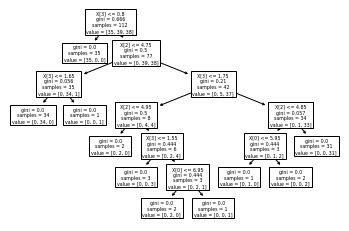

In [29]:
from sklearn import tree

tree.plot_tree(dtc)

In [30]:
dx_pred=dtc.predict(X_train)

dty_pred=dtc.predict(X_test)

print(f'Train accuracy: {accuracy_score(y_train,dx_pred)}')
print(f'test accuracy: {accuracy_score(y_test,dty_pred)}')

Train accuracy: 1.0
test accuracy: 1.0


Randomforest

In [31]:
from sklearn.ensemble import RandomForestClassifier


rfc=RandomForestClassifier()


rfc.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
rfcx_pred=rfc.predict(X_train)

rfcy_pred=rfc.predict(X_test)

print(f'Train accuracy: {accuracy_score(y_train,rfcx_pred)}')
print(f'test accuracy: {accuracy_score(y_test,rfcy_pred)}')

Train accuracy: 1.0
test accuracy: 1.0
